# A rotating mesh with spots

In [1]:
from spice.models import IcosphereModel
from spice.models.mesh_transform import add_rotation, evaluate_rotation
from spice.plots import plot_3D
from spice.spectrum import simulate_observed_flux
import jax.numpy as jnp
import numpy as np
from transformer_payne import TransformerPayne
import matplotlib.pyplot as plt
%matplotlib inline

from jax import config
config.update('jax_platform_name', 'cpu')

Let's use the simplest example for the sake of speed - the blackbody flux from the ```transformer_payne``` package.

In [2]:
tp = TransformerPayne.download()

The API is in the functional paradigm - you pass a "model" mesh, and the function returns a modified version of the mesh. However, the original passed mesh still remains if you choose not to overwrite these variables.

This function will add two temperature spherical harmonics.

In [9]:
m = IcosphereModel.construct(1000, 1., 1., tp.to_parameters(), tp.stellar_parameter_names)

The API is in the functional paradigm - you pass a "model" mesh, and the function returns a modified version of the mesh. However, the original passed mesh still remains if you choose not to overwrite these variables.

Let's call the ```evaluate``` function to include rotation and calculate models with rotation effects for various rotation phases.

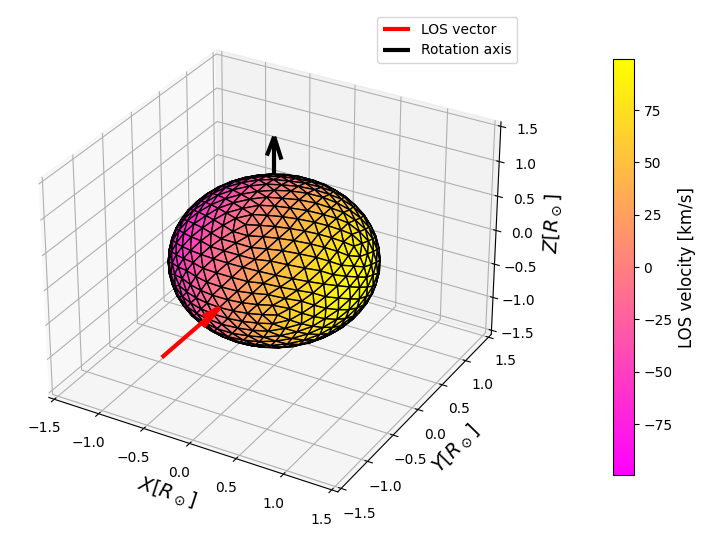

In [10]:
mt = add_rotation(m, 100, jnp.array([0., 0., 1.]))
mt = evaluate_rotation(mt, 0.)

fig, plot_ax = plot_3D(mt, 'los_velocities', cmap='spring')
plt.show()

## Spectrum emulation

Now we can simulate the spectrum at the default distance of $d=10$ pc.

In [11]:
vws = np.linspace(4670, 4960, 1000)
spec_no_rot = simulate_observed_flux(tp.intensity, m, jnp.log10(vws), chunk_size=100, wavelengths_chunk_size=100)
spec_rot = simulate_observed_flux(tp.intensity, mt, jnp.log10(vws), chunk_size=100, wavelengths_chunk_size=100)

Let's plot the subset to see the change of the line more clearly.

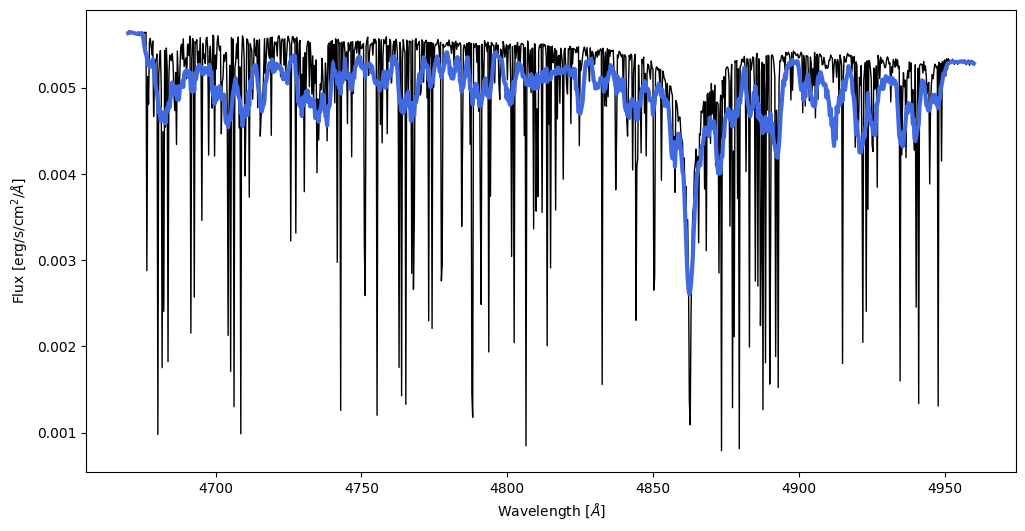

In [12]:
_, ax = plt.subplots(figsize=(12, 6))
# Plot the spectra with colors based on timesteps
plt.plot(vws, spec_no_rot[:, 0], color='black', linewidth=1)
plt.plot(vws, spec_rot[:, 0], color='royalblue', linewidth=3)
# Add a colorbar
ax.set_xlabel(r'Wavelength [$\AA$]')
ax.set_ylabel(r'Flux [erg/s/cm$^2$/$\AA$]');
plt.show()